In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from publications.infsci2023.analysis import *

In [4]:
path = "/data/output/runs/"

In [5]:
path_input_individual = f"{path}individual*"
df_individual = get_df_from_path(path_input_individual)
df_individual

name                             fit_time    roc_time  roc_value
class id    model       run_id                                  
fan   id_00 Hitachi     0       96.532016   86.669598   0.664423
                        1       93.864900  100.434935   0.674233
                        2       83.001166   87.588002   0.651522
                        3       95.750705   87.487772   0.579937
                        4       80.045455   87.470278   0.618718
...                                   ...         ...        ...
valve id_06 MFCCMix S+C 25      25.575816    6.189893   0.760486
                        26      26.197620    6.293056   0.818542
                        27      25.585341    6.307370   0.807986
                        28      26.501670    6.459529   0.808264
                        29      25.659018    6.230306   0.844097

[3840 rows x 3 columns]

In [6]:
import numpy as np
import numpy as np, scipy.stats as st

def f_conf_interval(df):
    ci = st.t.interval(0.95, len(df)-1, loc=np.mean(df), scale=st.sem(df))
    ci_l = np.round(ci[0], 2)
    ci_u = np.round(ci[1], 2)
    return f"({ci_l}, {ci_u})"

In [7]:
# df_slice = (slice(None), slice(None), slice(None))
df_slice = (slice(None), slice(None), ["Hitachi", "MFCCMix M+S+C"])

In [8]:
index = []
values = ['roc_value']
aggfunc = [f_conf_interval]
df_individual_agg = get_df_aggregate(df_individual, index, values, df_slice, aggfunc)
df_individual_agg

name f_conf_interval              
model                               Hitachi MFCCMix M+S+C
class id  run_id                                         
all   all all     roc_value    (0.75, 0.78)  (0.82, 0.84)

In [9]:
index = ['class']
values = ['roc_value']
aggfunc = [f_conf_interval]
df_individual_agg = get_df_aggregate(df_individual, index, values, df_slice, aggfunc)
df_individual_agg


f_conf_interval              
name                    roc_value              
model                     Hitachi MFCCMix M+S+C
class  id  run_id                              
fan    all all       (0.79, 0.84)  (0.85, 0.87)
pump   all all       (0.78, 0.83)   (0.88, 0.9)
slider all all       (0.83, 0.88)  (0.84, 0.88)
valve  all all       (0.58, 0.61)   (0.7, 0.73)

In [10]:
index = ['class', 'id']
values = ['roc_value']
aggfunc = [f_conf_interval]
df_individual_agg = get_df_aggregate(df_individual, index, values, df_slice, aggfunc)
df_individual_agg

f_conf_interval              
name                      roc_value              
model                       Hitachi MFCCMix M+S+C
class  id    run_id                              
fan    id_00 all       (0.61, 0.64)  (0.72, 0.73)
       id_02 all       (0.88, 0.89)  (0.91, 0.91)
       id_04 all       (0.76, 0.79)  (0.88, 0.89)
       id_06 all       (0.98, 0.99)  (0.91, 0.92)
pump   id_00 all       (0.75, 0.77)  (0.94, 0.94)
       id_02 all       (0.61, 0.64)  (0.82, 0.84)
       id_04 all       (0.98, 0.99)  (0.92, 0.93)
       id_06 all       (0.84, 0.87)  (0.85, 0.88)
slider id_00 all       (0.99, 0.99)   (0.99, 1.0)
       id_02 all       (0.86, 0.88)   (0.9, 0.91)
       id_04 all       (0.85, 0.89)  (0.85, 0.86)
       id_06 all       (0.67, 0.71)  (0.66, 0.68)
valve  id_00 all       (0.45, 0.55)   (0.78, 0.8)
       id_02 all        (0.6, 0.63)  (0.67, 0.69)
       id_04 all       (0.66, 0.71)  (0.77, 0.79)
       id_06 all        (0.56, 0.6)   (0.6, 0.62)

In [11]:
index = ['class', 'id', 'run_id']
values = ['roc_value']
df_individual_agg = get_df_aggregate(df_individual, index, values, df_slice)
df_individual_agg

mean              
name               roc_value              
model                Hitachi MFCCMix M+S+C
class id    run_id                        
fan   id_00 0       0.664423      0.732114
            1       0.674233      0.689047
            2       0.651522      0.699533
            3       0.579937      0.735103
            4       0.618718      0.732525
...                      ...           ...
valve id_06 25      0.609167      0.605833
            26      0.581806      0.613194
            27      0.515764      0.596875
            28      0.597153      0.610972
            29      0.635347      0.629514

[480 rows x 2 columns]

## Combined Analysis

In [12]:
path_input_combined = f"{path}combined*"
df_combined = get_df_from_path(path_input_combined)
df_combined

name                              fit_time   roc_time  roc_value
class id    model       run_id                                  
fan   id_00 Hitachi     0       438.866474  98.962994   0.589838
                        1       360.193581  88.249073   0.622388
                        2       413.123737  88.738405   0.574214
                        3       410.448413  88.064430   0.578645
                        4       414.973214  88.939829   0.615138
...                                    ...        ...        ...
valve id_06 MFCCMix S+C 25       66.407026   5.912294   0.198611
                        26       66.450557   6.075957   0.213958
                        27       64.961831   6.142882   0.254306
                        28       64.660936   6.241161   0.232014
                        29       65.307897   6.194087   0.233056

[3904 rows x 3 columns]

In [13]:
index = []
values = ['roc_value']
aggfunc = [f_conf_interval]
df_combined_agg = get_df_aggregate(df_combined, index, values, df_slice, aggfunc)
df_combined_agg

name f_conf_interval              
model                               Hitachi MFCCMix M+S+C
class id  run_id                                         
all   all all     roc_value    (0.55, 0.58)  (0.59, 0.62)

In [14]:
index = ['class']
values = ['roc_value']
aggfunc = [f_conf_interval]
df_combined_agg = get_df_aggregate(df_combined, index, values, df_slice, aggfunc)
df_combined_agg

f_conf_interval              
name                    roc_value              
model                     Hitachi MFCCMix M+S+C
class  id  run_id                              
fan    all all       (0.48, 0.54)  (0.62, 0.65)
pump   all all       (0.56, 0.64)  (0.57, 0.66)
slider all all       (0.67, 0.74)   (0.64, 0.7)
valve  all all       (0.46, 0.48)   (0.47, 0.5)

In [15]:
index = ['class', 'id']
values = ['roc_value']
aggfunc = [f_conf_interval]
df_combined_agg = get_df_aggregate(df_combined, index, values, df_slice, aggfunc)
df_combined_agg

f_conf_interval              
name                      roc_value              
model                       Hitachi MFCCMix M+S+C
class  id    run_id                              
fan    id_00 all        (0.58, 0.6)  (0.56, 0.58)
       id_02 all       (0.48, 0.51)   (0.6, 0.66)
       id_04 all        (0.65, 0.7)  (0.61, 0.64)
       id_06 all        (0.27, 0.3)  (0.69, 0.72)
pump   id_00 all       (0.71, 0.73)  (0.83, 0.85)
       id_02 all       (0.77, 0.79)   (0.75, 0.8)
       id_04 all       (0.17, 0.23)   (0.2, 0.24)
       id_06 all       (0.62, 0.65)  (0.62, 0.65)
slider id_00 all       (0.98, 0.99)   (0.8, 0.88)
       id_02 all       (0.71, 0.75)  (0.71, 0.75)
       id_04 all       (0.59, 0.65)   (0.6, 0.64)
       id_06 all       (0.44, 0.52)  (0.46, 0.51)
valve  id_00 all       (0.44, 0.47)  (0.49, 0.53)
       id_02 all       (0.57, 0.59)  (0.58, 0.61)
       id_04 all       (0.46, 0.49)  (0.45, 0.48)
       id_06 all       (0.37, 0.38)   (0.36, 0.4)

In [16]:
index = ['class', 'id']
values = ['fit_time', 'roc_time']
aggfunc = [f_conf_interval]
df_combined_agg = get_df_aggregate(df_combined, index, values, df_slice, aggfunc)
df_combined_agg

f_conf_interval                                   
name                         fit_time                        roc_time   
model                         Hitachi   MFCCMix M+S+C         Hitachi   
class  id    run_id                                                     
fan    id_00 all     (417.62, 433.93)  (56.35, 56.74)  (88.26, 89.72)  \
       id_02 all     (400.66, 415.78)  (54.92, 55.33)  (77.56, 78.27)   
       id_04 all     (390.45, 405.66)  (54.21, 54.66)  (75.24, 75.78)   
       id_06 all     (401.71, 416.83)   (55.1, 55.48)  (78.04, 78.73)   
pump   id_00 all     (553.38, 583.64)  (68.33, 68.81)  (30.92, 31.39)   
       id_02 all     (567.42, 588.09)  (67.64, 68.22)  (23.88, 24.14)   
       id_04 all     (691.37, 715.05)  (76.03, 76.55)  (21.47, 21.93)   
       id_06 all     (554.65, 574.66)  (66.35, 66.76)  (22.06, 22.33)   
slider id_00 all      (294.6, 303.02)  (45.49, 45.91)  (76.71, 77.83)   
       id_02 all     (267.59, 275.27)  (42.89, 43.21)  (57.47, 58.09)   
       id_04 all     (385.66, 408.03)  (55.24, 55.69)  (38.18, 38.64)   
       id_06 all     (353.64, 373.23)  (52.98, 53.36)   (19.1, 19.34)   
valve  id_00 all     (514.28, 546.73)  (65.98, 66.48)  (25.83, 26.28)   
       id_02 all     (645.34, 673.45)  (73.68, 74.29)  (25.77, 26.02)   
       id_04 all      (544.97, 569.8)  (65.85, 66.44)   (25.75, 26.0)   
       id_06 all     (549.42, 573.99)  (65.97, 66.54)  (25.87, 26.26)   

                                     
name                                 
model                 MFCCMix M+S+C  
class  id    run_id                  
fan    id_00 all       (20.9, 21.1)  
       id_02 all      (18.4, 18.57)  
       id_04 all      (17.84, 18.0)  
       id_06 all     (18.43, 18.62)  
pump   id_00 all       (7.35, 7.44)  
       id_02 all        (5.71, 5.8)  
       id_04 all       (5.16, 5.24)  
       id_06 all       (5.26, 5.35)  
slider id_00 all      (18.3, 18.48)  
       id_02 all      (13.66, 13.8)  
       id_04 all       (9.15, 9.25)  
       id_06 all       (4.57, 4.65)  
valve  id_00 all        (6.13, 6.2)  
       id_02 all       (6.18, 6.27)  
       id_04 all       (6.14, 6.26)  
       id_06 all       (6.15, 6.22)

## PLOTS

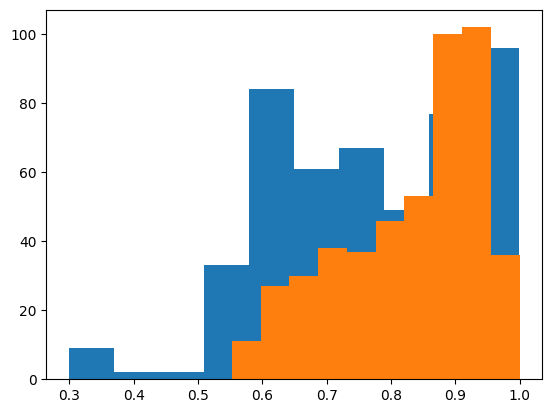

In [17]:
import scipy.stats as st
import matplotlib.pyplot as plt
a = df_individual.loc[(slice(None), slice(None), ['Hitachi'])]['roc_value'].values
b = df_individual.loc[(slice(None), slice(None), ['MFCCMix M+S+C'])]['roc_value'].values
plt.hist(a)
plt.hist(b)
plt.show()

In [18]:
st.ttest_ind(b,a, alternative='greater')

Ttest_indResult(statistic=6.839993071168366, pvalue=7.050470374951993e-12)

In [104]:
data = df_individual.reset_index()
data

name,class,id,model,run_id,fit_time,roc_time,roc_value
0,fan,id_00,Hitachi,0,96.532016,86.669598,0.664423
1,fan,id_00,Hitachi,1,93.864900,100.434935,0.674233
2,fan,id_00,Hitachi,2,83.001166,87.588002,0.651522
3,fan,id_00,Hitachi,3,95.750705,87.487772,0.579937
4,fan,id_00,Hitachi,4,80.045455,87.470278,0.618718
...,...,...,...,...,...,...,...
3835,valve,id_06,MFCCMix S+C,25,25.575816,6.189893,0.760486
3836,valve,id_06,MFCCMix S+C,26,26.197620,6.293056,0.818542
3837,valve,id_06,MFCCMix S+C,27,25.585341,6.307370,0.807986
3838,valve,id_06,MFCCMix S+C,28,26.501670,6.459529,0.808264


In [105]:
RANDOM_SEED = 8924


In [141]:
class_key, class_map = data["class"].factorize(sort=True)
id_key, id_map = data["id"].factorize(sort=True)
model_key, model_map = data["model"].factorize(sort=True)
coords = {
    "set": data.index,
    "class": class_map,
    "id": id_map,
    "model": model_map
}


In [234]:
import pymc as pm


y = data['roc_value'].values
with pm.Model(coords=coords) as roc_model:

    x_class =  pm.MutableData('x_class', class_key, dims='obs_id')
    x_id =  pm.MutableData('x_id', id_key, dims='obs_id')
    x_model =  pm.MutableData('x_model', model_key, dims='obs_id')

    mu_a = pm.Normal("mu_a", mu=0.0, sigma=10)
    sigma_a = pm.Exponential("sigma_a", 1)

    alpha_class = pm.Normal('alpha_class', mu=mu_a, sigma=sigma_a, dims='class')
    # sigma_class = pm.Exponential("sigma_class", 1)

    # alpha_id = pm.Normal('alpha_id', mu=alpha_class, sigma=sigma_a, dims='id')
    # sigma_id = pm.Exponential("sigma_id", 1)

    alpha_model = pm.Normal('alpha_model', mu=alpha_class, sigma=sigma_a, dims='model')
    # beta = pm.Normal('beta', 0, sigma=1)
    
    sigma_y = pm.Exponential('sigma_y', lam=1)
    
    # cat_class = pm.Normal('cat_class', 0,1, shape=len(class_map))
    # cat_class = pm.Normal('cat_class', 0,1, dims='class')
    # cat_id = pm.Normal('cat_id', 0, 1, shape=(len(class_map), len(id_map)))
    # cat_id = pm.Normal('cat_id', 0, 1, dims='data')
    # cat_model = pm.Normal('cat_model', 0, 1, dims='model')
    
    y_hat = alpha_model[x_model]
    
    y_like = pm.Normal('y_hat', mu=y_hat, sigma=sigma_y, observed=y, dims='obs_id')

In [235]:
with roc_model:
    prior_checks = pm.sample_prior_predictive(random_seed=RANDOM_SEED)

Sampling: [alpha_class, alpha_model, mu_a, sigma_a, sigma_y, y_hat]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (3840,).
Apply node that caused the error: normal_rv{0, (0, 0), floatX, True}(RandomGeneratorSharedVariable(<Generator(PCG64) at 0x7F700A427740>), [8], 11, AdvancedSubtensor1.0, sigma_a)
Toposort index: 4
Inputs types: [RandomGeneratorType, TensorType(int64, shape=(1,)), TensorType(int64, shape=()), TensorType(float64, shape=(None,)), TensorType(float64, shape=())]
Inputs shapes: ['No shapes', (1,), (), (3840,), ()]
Inputs strides: ['No strides', (8,), (), (8,), ()]
Inputs values: [Generator(PCG64) at 0x7F700A427740, array([8]), array(11), 'not shown', array(2.07186036)]
Outputs clients: [['output'], ['output', AdvancedSubtensor1(alpha_model, x_model)]]

HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

In [236]:
prior = prior_checks.prior.squeeze(drop=True)



In [237]:
with roc_model:
    pooled_trace = pm.sample(random_seed=RANDOM_SEED)

AssertionError: Shapes must be equal
Apply node that caused the error: Assert{msg=Shapes must be equal}(BroadcastTo.0, Eq.0)
Toposort index: 7
Inputs types: [TensorType(float64, shape=(None,)), TensorType(bool, shape=())]
Inputs shapes: [(3840,), ()]
Inputs strides: [(8,), ()]
Inputs values: ['not shown', array(False)]
Outputs clients: [[SpecifyShape(Assert{msg=Shapes must be equal}.0, 8)]]

HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

In [ ]:
import arviz as az

with roc_model:
    display(az.summary(pooled_trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_a,0.77,0.04,0.71,0.83,0.0,0.0,2393.58,1220.60,1.00
alpha_class[fan],0.79,0.05,0.71,0.86,0.0,0.0,2802.05,1082.93,1.00
alpha_class[pump],0.78,0.04,0.70,0.85,0.0,0.0,2609.28,1526.61,1.00
alpha_class[slider],0.78,0.04,0.71,0.85,0.0,0.0,3053.83,1178.43,1.01
alpha_class[valve],0.75,0.04,0.68,0.82,0.0,0.0,3127.39,1506.45,1.00
alpha_id[id_00],0.80,0.00,0.79,0.81,0.0,0.0,2578.22,2392.93,1.00
alpha_id[id_02],0.79,0.00,0.78,0.80,0.0,0.0,2589.04,1782.39,1.00
alpha_id[id_04],0.78,0.00,0.77,0.79,0.0,0.0,2924.95,2320.07,1.00
alpha_id[id_06],0.73,0.00,0.72,0.74,0.0,0.0,3119.16,2486.74,1.00
sigma_a,0.04,0.04,0.01,0.09,0.0,0.0,569.99,694.41,1.01


array([[<Axes: title={'center': 'mu_a'}>,
        <Axes: title={'center': 'mu_a'}>],
       [<Axes: title={'center': 'alpha_class'}>,
        <Axes: title={'center': 'alpha_class'}>],
       [<Axes: title={'center': 'alpha_id'}>,
        <Axes: title={'center': 'alpha_id'}>],
       [<Axes: title={'center': 'sigma_a'}>,
        <Axes: title={'center': 'sigma_a'}>],
       [<Axes: title={'center': 'sigma_y'}>,
        <Axes: title={'center': 'sigma_y'}>]], dtype=object)

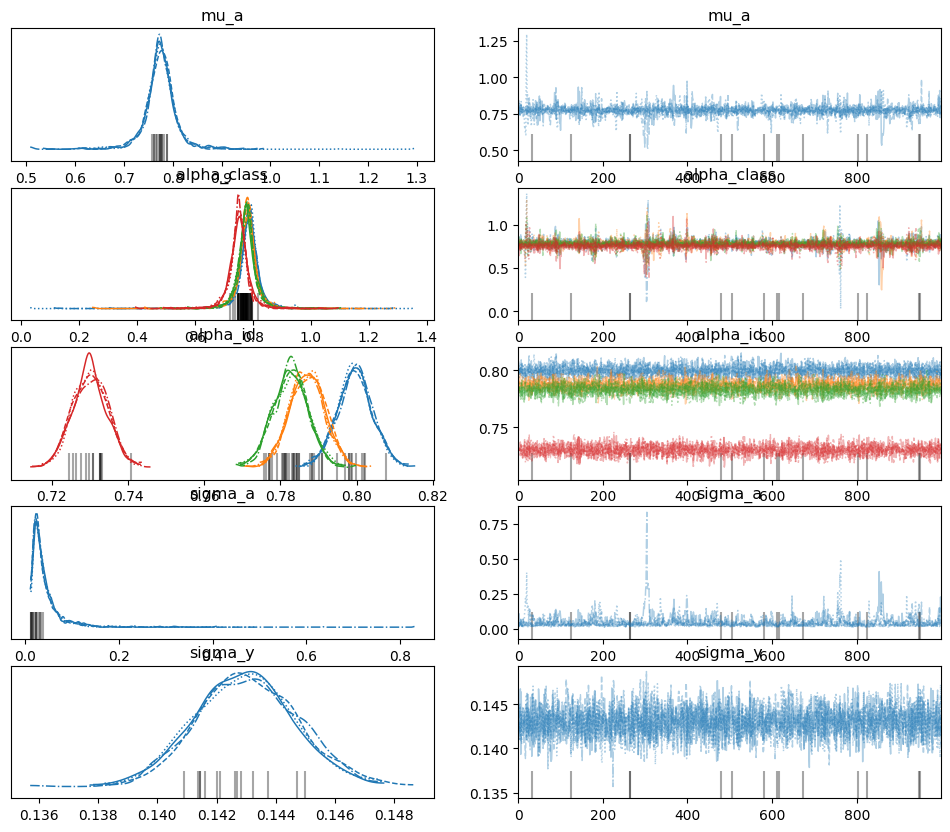

In [ ]:
import arviz as az
az.plot_trace(pooled_trace)
# az.plot_forest(idata)
# az.plot_posterior(idata)

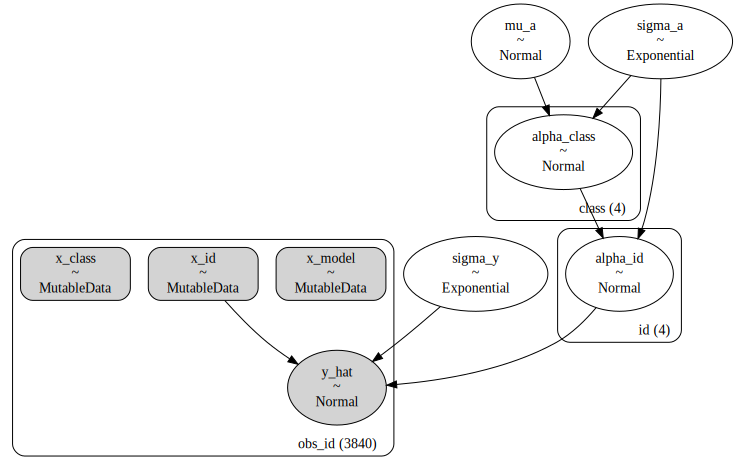

In [228]:
pm.model_to_graphviz(roc_model)
